In [1]:
import pandas as pd

In [2]:
from glob import glob
files = glob('./data/*.csv')

In [54]:
result = pd.DataFrame(columns=['title','contents'])
for ifile in files:
    df = pd.read_csv(ifile)
    result = pd.concat([result,df], axis=0)

In [55]:
import re

In [56]:
result['title'] = result['title'].apply(lambda x : x.strip() )


In [57]:
tmp =result.reset_index()
tmp[tmp['title']=='소득세법']

,index,title,contents
58,8,소득세법,제1조(목적) 이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에...
158,8,소득세법,제1조(목적) 이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에...
420,20,소득세법,제1조(목적) 이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에...
2677,27,소득세법,제1조(목적) 이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에...
3502,2,소득세법,제1조(목적) 이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에...
4175,25,소득세법,제1조(목적) 이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에...
5262,12,소득세법,제1조(목적) 이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에...


In [58]:
result = result.reset_index(drop=True)

In [59]:
result

,title,contents
0,정부조직법,제1조(목적) 이 법은 국가행정사무의 체계적이고 능률적인 수행을 위하여 국가행정기...
1,학교시설사업 촉진법,제1조(목적) 이 법은 초등학교ㆍ중학교ㆍ고등학교 및 특수학교의 시설의 설치ㆍ이전 및...
2,공공차관의도입및관리에관한법률시행규칙,제1조(목적) 이 규칙은 공공차관의도입및관리에관한법률 및 동법시행령에서 위임된 사항...
3,사법정책자문위원회 규칙,제1조 (목적) 이 규칙은 법원조직법 제25조에 규정된 사법정책자문위원회(이하 ‘위...
4,연구실 안전환경 조성에 관한 법률 시행규칙,제1조(목적) 이 규칙은 「연구실 안전환경 조성에 관한 법률」 및 같은 법 시행령에...
...,...,...
5645,과학기술정보통신부와 그 소속기관 직제,"제1조(목적) 이 영은 과학기술정보통신부와 그 소속기관의 조직과 직무범위, 그 밖..."
5646,주식ㆍ사채 등의 전자등록에 관한 법률 시행령,제1조(목적) 이 영은 「주식ㆍ사채 등의 전자등록에 관한 법률」에서 위임된 사항과 ...
5647,휴직법관에 대한 보수지급에 관한 규칙,제1조(목적 및 적용범위) 이 규칙은 「법원조직법」 제51조제2항의 규정에 의한 휴...
5648,국립생태원 건립위원회 규정,제1조 (목적) 기후변화를 연구ㆍ교육하고 멸종위기 생물종을 보전하는 기능을 주로 수...


In [60]:
result = result.drop_duplicates(subset='title')

In [61]:
result = result.set_index('title')

In [62]:
def find_age_regex(d):
    string_pool = d['contents']
    l = re.findall(r'[만]*[\s]*[0-9]+[\s]*세[^가-힇()][\s]*[이]?[상하전후내외]?[미]?[만]?[초]?[과]?', string_pool)
    return [i.strip() for i in l]
result['age'] = result.fillna('').apply(find_age_regex, axis=1)
    

In [63]:
result = result[['age']]

In [64]:
result.describe()

,age
count,5058
unique,256
top,[]
freq,4654


In [65]:
result#[[]].drop_duplicates()

,age
title,
정부조직법,[]
학교시설사업 촉진법,[]
공공차관의도입및관리에관한법률시행규칙,[]
사법정책자문위원회 규칙,[]
연구실 안전환경 조성에 관한 법률 시행규칙,[]
...,...
교육환경 보호에 관한 법률 시행령,[]
과학기술정보통신부와 그 소속기관 직제,[]
주식ㆍ사채 등의 전자등록에 관한 법률 시행령,[]


In [66]:
df = result[result['age'].apply(len).gt(0)]

In [67]:
df

,age
title,
가사소송규칙,"[13세 이상, 13세 이상, 13세 이상, 13세 이상]"
전통시장 및 상점가 육성을 위한 특별법 시행령,[39세 이하]
자동차 및 자동차부품의 성능과 기준에 관한 규칙,"[13세 미만, 13세 미만]"
우편법 시행규칙,[18세 이상]
소득세법,"[6세 이하, 6세 이하, 60세 이상, 20세 이하, 20세 이하, 60세 이상,..."
...,...
식물신품종 보호법에 따른 품종보호료 및 수수료 징수규칙,[2세]
입양특례법 시행규칙,"[25세 이상, 60세 이내, 25세 이상, 45세 미만, 13세 이상]"
노인복지법 시행령,"[65세 이상, 65세 이상, 65세 이상]"


In [68]:
def age_hist(d):
    
    age_list = d['age']
    result = [0 for j in range(11)]
    for j in [int(iage.split('세')[0]) for iage in age_list if not iage.split('세')[0].startswith('만') ]:
        jindex = int(j/10)

        result[jindex]+=1
    for j in [int(iage.split('세')[0].split('만')[-1]) for iage in age_list if iage.split('세')[0].startswith('만') ]:
        jindex = int(j/10)
        result[jindex]+=1
    return pd.Series(result)

In [69]:
df[["{}대".format(i) for i in range(0,110,10)]] = df.apply(age_hist, axis=1)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


단순 연령대별 시각화

In [70]:
tmp_df = df[["{}대".format(i) for i in range(0,110,10)]]

In [71]:
tmp_df

,0대,10대,20대,30대,40대,50대,60대,70대,80대,90대,100대
title,,,,,,,,,,,
가사소송규칙,0,4,0,0,0,0,0,0,0,0,0
전통시장 및 상점가 육성을 위한 특별법 시행령,0,0,0,1,0,0,0,0,0,0,0
자동차 및 자동차부품의 성능과 기준에 관한 규칙,0,2,0,0,0,0,0,0,0,0,0
우편법 시행규칙,0,1,0,0,0,0,0,0,0,0,0
소득세법,3,1,2,0,0,0,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
식물신품종 보호법에 따른 품종보호료 및 수수료 징수규칙,1,0,0,0,0,0,0,0,0,0,0
입양특례법 시행규칙,0,1,2,0,1,0,1,0,0,0,0
노인복지법 시행령,0,0,0,0,0,0,3,0,0,0,0


In [72]:
import numpy as np

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (5,5)

In [74]:
import seaborn as sns

In [75]:
tmp_df.sum().to_frame()

,0
0대,125
10대,634
20대,133
30대,70
40대,27
50대,63
60대,338
70대,42
80대,2
90대,0


In [76]:
tmp_df

,0대,10대,20대,30대,40대,50대,60대,70대,80대,90대,100대
title,,,,,,,,,,,
가사소송규칙,0,4,0,0,0,0,0,0,0,0,0
전통시장 및 상점가 육성을 위한 특별법 시행령,0,0,0,1,0,0,0,0,0,0,0
자동차 및 자동차부품의 성능과 기준에 관한 규칙,0,2,0,0,0,0,0,0,0,0,0
우편법 시행규칙,0,1,0,0,0,0,0,0,0,0,0
소득세법,3,1,2,0,0,0,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
식물신품종 보호법에 따른 품종보호료 및 수수료 징수규칙,1,0,0,0,0,0,0,0,0,0,0
입양특례법 시행규칙,0,1,2,0,1,0,1,0,0,0,0
노인복지법 시행령,0,0,0,0,0,0,3,0,0,0,0


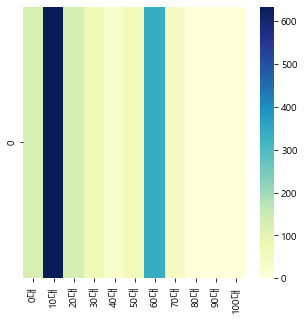

In [77]:
# tmp = tmp_df.sum()
sns.heatmap(tmp_df.sum().to_frame().T,cmap='YlGnBu' )
plt.show()


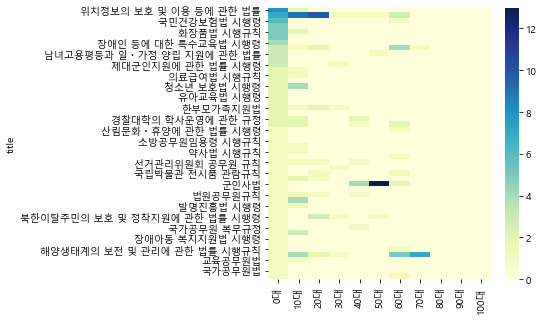

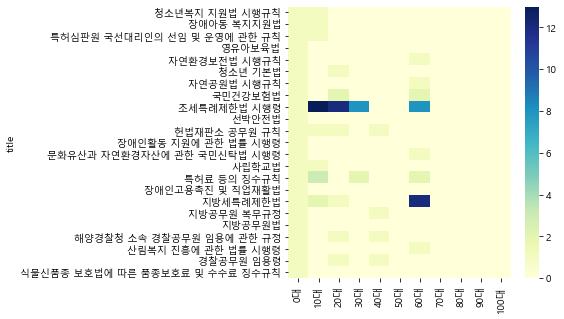

In [78]:
for i in range(0, len(tmp_df[tmp_df['0대']!=0].sort_values(by='0대', ascending=False)),50):
    tmp = tmp_df[tmp_df['0대']!=0].sort_values(by='0대', ascending=False).iloc[i:i+50]
    sns.heatmap(tmp,cmap='YlGnBu' )
    plt.show()

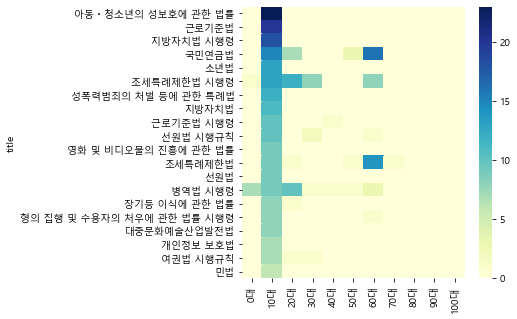

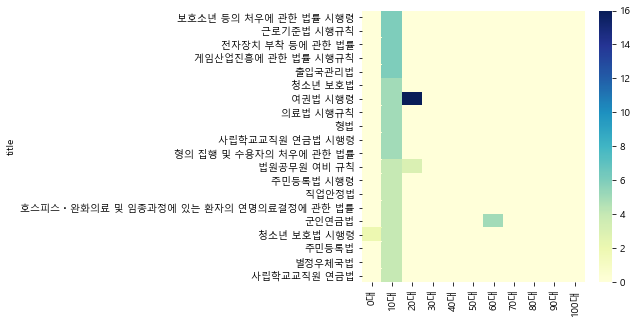

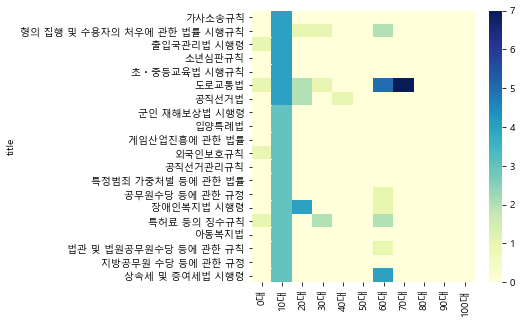

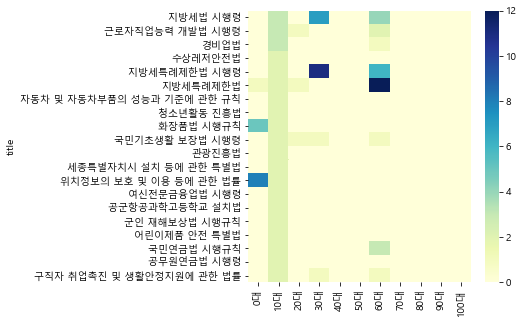

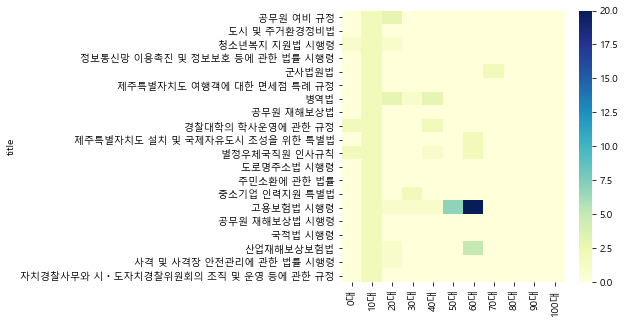

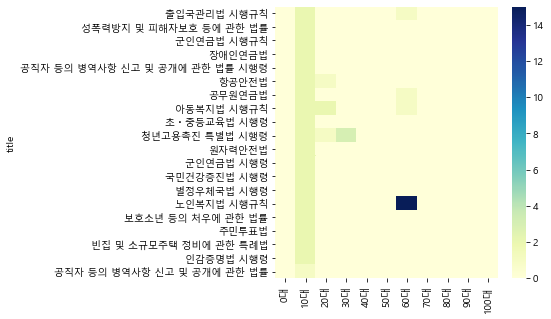

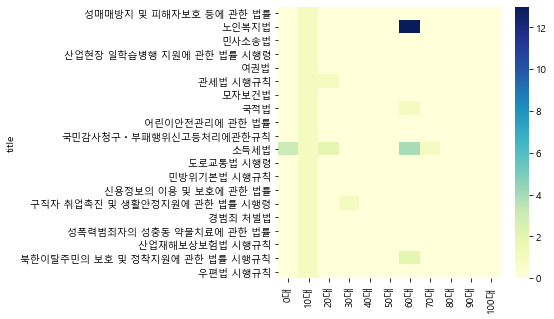

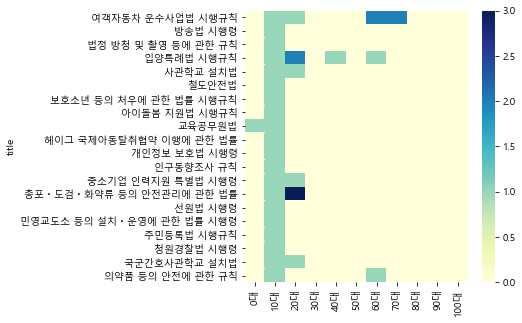

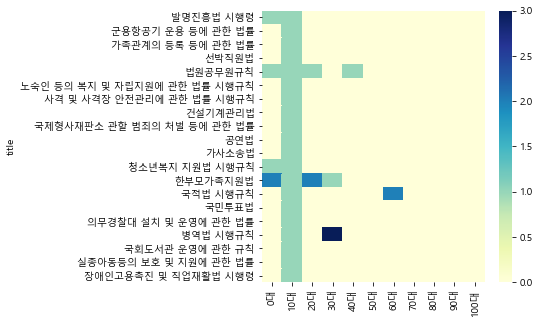

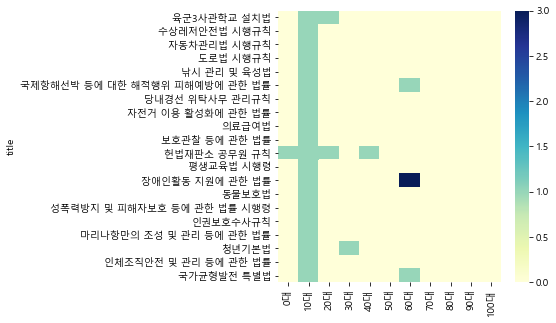

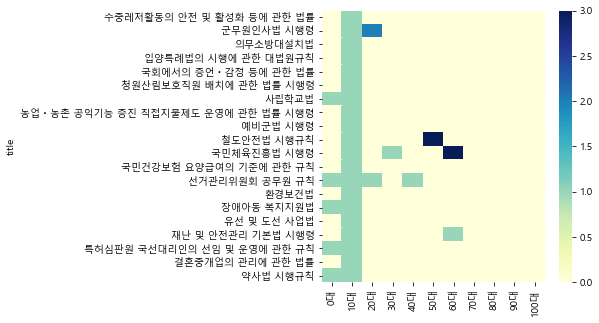

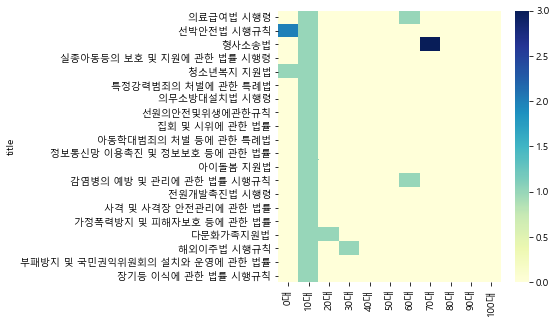

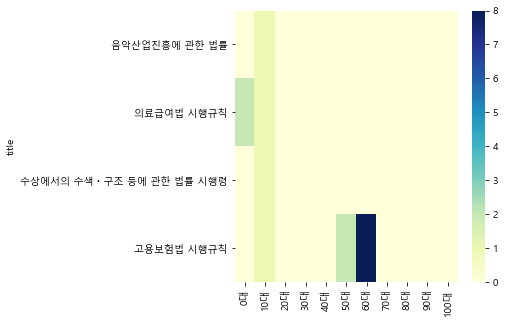

In [79]:
for i in range(0, len(tmp_df[tmp_df['10대']!=0].sort_values(by='10대', ascending=False)),20):
    tmp = tmp_df[tmp_df['10대']!=0].sort_values(by='10대', ascending=False).iloc[i:i+20]
    sns.heatmap(tmp,cmap='YlGnBu' )
    plt.show()

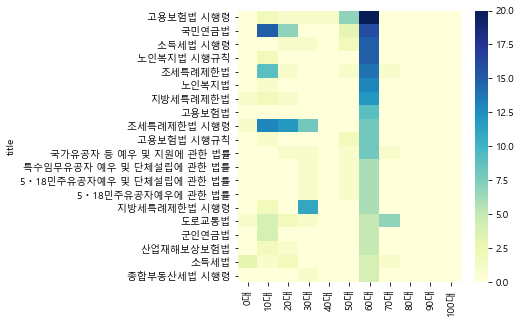

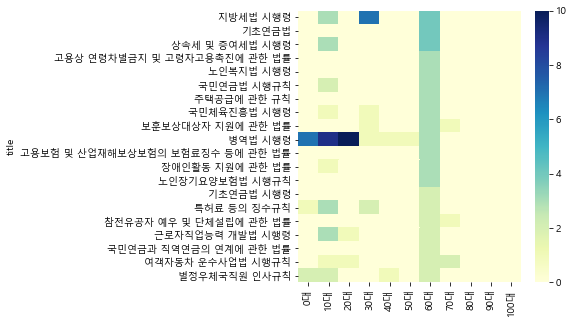

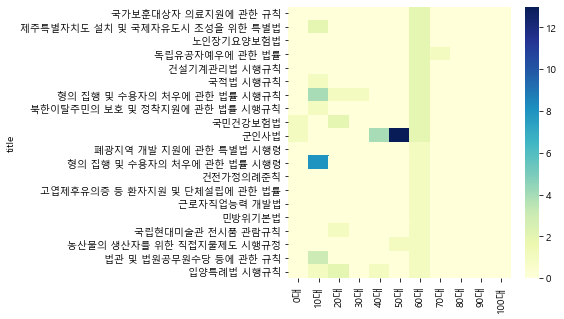

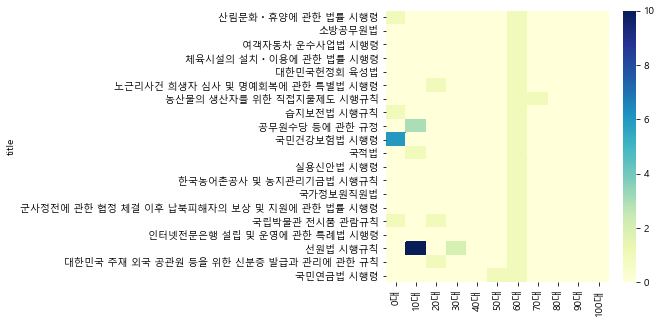

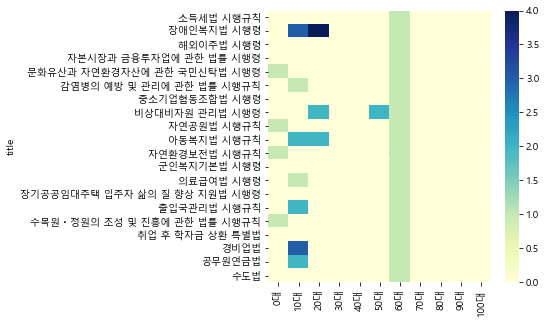

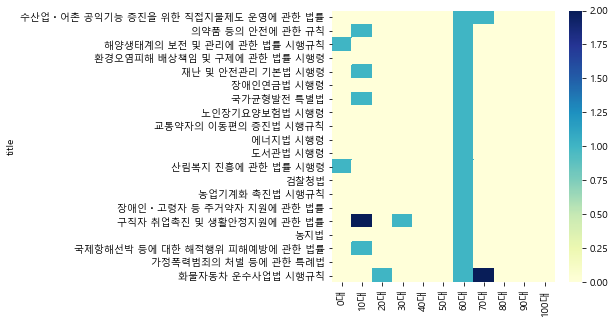

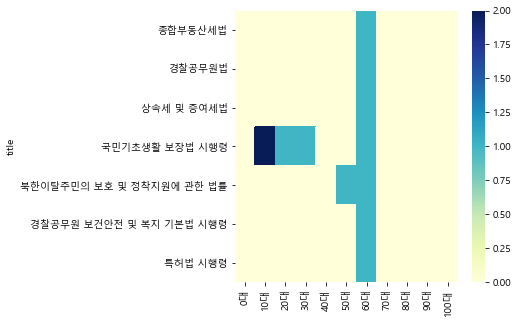

In [80]:
for i in range(0, len(tmp_df[tmp_df['60대']!=0].sort_values(by='60대', ascending=False)),20):
    tmp = tmp_df[tmp_df['60대']!=0].sort_values(by='60대', ascending=False).iloc[i:i+20]
    sns.heatmap(tmp,cmap='YlGnBu' )
    plt.show()

In [81]:
df

,age,0대,10대,20대,30대,40대,50대,60대,70대,80대,90대,100대
title,,,,,,,,,,,,
가사소송규칙,"[13세 이상, 13세 이상, 13세 이상, 13세 이상]",0,4,0,0,0,0,0,0,0,0,0
전통시장 및 상점가 육성을 위한 특별법 시행령,[39세 이하],0,0,0,1,0,0,0,0,0,0,0
자동차 및 자동차부품의 성능과 기준에 관한 규칙,"[13세 미만, 13세 미만]",0,2,0,0,0,0,0,0,0,0,0
우편법 시행규칙,[18세 이상],0,1,0,0,0,0,0,0,0,0,0
소득세법,"[6세 이하, 6세 이하, 60세 이상, 20세 이하, 20세 이하, 60세 이상,...",3,1,2,0,0,0,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
식물신품종 보호법에 따른 품종보호료 및 수수료 징수규칙,[2세],1,0,0,0,0,0,0,0,0,0,0
입양특례법 시행규칙,"[25세 이상, 60세 이내, 25세 이상, 45세 미만, 13세 이상]",0,1,2,0,1,0,1,0,0,0,0
노인복지법 시행령,"[65세 이상, 65세 이상, 65세 이상]",0,0,0,0,0,0,3,0,0,0,0


In [82]:
age_dict = {}
for idx, row in df.iterrows():
    data = row['age']
    for item in data:
        if item not in age_dict.keys():
            age_dict[item] = 1
        else:
            age_dict[item]+=1

In [85]:
age_dict

{'13세 이상': 22,
 '39세 이하': 2,
 '13세 미만': 35,
 '18세 이상': 66,
 '6세 이하': 11,
 '60세 이상': 111,
 '20세 이하': 6,
 '70세 이상': 15,
 '7세 이상': 2,
 '65세 이상': 108,
 '18세 미만': 93,
 '19세 미만': 70,
 '19세 이상': 108,
 '만 17세 이상': 1,
 '20세 미만': 11,
 '만 20세 이상': 5,
 '1세 초과': 3,
 '21세 이상': 3,
 '40세 이하': 7,
 '만 8세 이하': 11,
 '65세 이후': 9,
 '65세 전': 4,
 '17세 이상': 16,
 '21세 미만': 2,
 '7세 미만': 6,
 '7세': 1,
 '만 11세 이상': 1,
 '만 18세 이후': 3,
 '18세 이후': 2,
 '25세 미만': 9,
 '24세 이하': 9,
 '25세 이상': 11,
 '27세 미만': 16,
 '27세 이상': 2,
 '65세 미만': 14,
 '60세 미만': 48,
 '만 17세 미만': 3,
 '만 14세 미만': 12,
 '6세 미만': 7,
 '35세 이하': 3,
 '3세': 2,
 '2세': 3,
 '1세': 3,
 '20세 이상': 21,
 '만 65세 이상': 5,
 '만 75세 미만': 1,
 '15세 미만': 20,
 '75세 이상': 19,
 '만 60세 이상': 11,
 '만 15세 미만': 1,
 '16세 미만': 25,
 '75세 미만': 2,
 '30세 이상': 7,
 '65세 이하': 1,
 '80세 이하': 1,
 '만 19세 미만': 6,
 '만 12세 이하': 3,
 '40세 이상': 2,
 '만 5세 이상': 2,
 '만 4세 이상': 3,
 '만 3세 이상': 3,
 '만 3세 미만': 5,
 '15세 이상': 42,
 '만 18세 이상': 5,
 '2세 이상': 1,
 '30세 이전': 7,
 '55세 이상': 19,
 '14세 미만': 24,
 '만 6세 이하':